In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
tqdm.pandas()

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline 

# Building Portfolio Bins

In [25]:
BIN_COUNT = 3

# long_bin, short_bin = BIN_COUNT-2,1
long_bin, short_bin = BIN_COUNT-1,0


In [26]:
prediction_df = pd.read_csv('model_output_v2.csv', usecols= ['gvkey','year','Support Vector Model Predict']).rename(columns={'Support Vector Model Predict':'prediction'})
# prediction_df = pd.read_csv('model_output_v2.csv', usecols= ['gvkey','year','XGBoost Model Predict']).rename(columns={'XGBoost Model Predict':'prediction'})
# prediction_df = pd.read_csv('model_output_v2.csv', usecols= ['gvkey','year','Random Forest Model Predict']).rename(columns={'Random Forest Model Predict':'prediction'})


In [27]:
print(prediction_df.info())
prediction_df = prediction_df.groupby(['gvkey','year']).mean().reset_index()
# prediction_df['prediction'] /= 100
prediction_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5363 entries, 0 to 5362
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gvkey       5363 non-null   int64  
 1   year        5363 non-null   int64  
 2   prediction  5363 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 125.8 KB
None


,gvkey,year,prediction
0,1048,2002,4.007617
1,1075,2002,2.774528
2,1075,2003,3.926695
3,1075,2005,2.974042
4,1075,2011,4.025776


# .

In [28]:
# with open('gvkey_list.txt','w') as f:
#     [f.write(str(x)+'\n') for x in prediction_df.gvkey.unique()]

In [29]:
prediction_df = pd.pivot_table(data = prediction_df, columns = 'year', values='prediction', index = 'gvkey')#.fillna(0.0)
prediction_df

year,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
gvkey,,,,,,,,,,,,,,,,
1048,4.007617,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1075,2.774528,3.926695,NaN,2.974042,NaN,NaN,NaN,NaN,NaN,4.025776,4.133559,1.884976,4.015210,1.457281,3.224099,NaN
1078,3.082763,3.086803,NaN,NaN,4.256606,4.015209,4.066000,2.772686,NaN,NaN,NaN,2.015209,3.015212,2.018189,3.019265,NaN
1177,2.166600,4.015210,NaN,NaN,4.015068,2.015209,2.015228,4.015249,NaN,NaN,NaN,3.015209,4.015025,2.070271,2.015209,NaN
1209,3.021341,3.015209,4.015209,3.718609,4.015209,3.015209,2.015209,4.015209,3.015209,2.015458,2.015208,2.015209,3.015209,3.015110,3.978465,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.015209,2.015530,1.208179,1.380194,NaN
189490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.015209,2.008100,NaN,NaN,NaN,NaN,NaN
189491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.798772,2.007824,4.019573,3.015206,2.109527,4.014201,NaN


In [30]:
lookup = dict()

def sorted_bins(arr, bins):
    x = arr.dropna()
    binned_x = pd.cut(x, bins, labels=[i for i in range(bins)])
    dict_binned_x = dict()
    for i in range(bins):
        dict_binned_x[i] = binned_x[binned_x == i].index.tolist()
    lookup[x.name] = dict_binned_x
    return

prediction_df.apply(lambda x: sorted_bins(x, bins=BIN_COUNT));

# Fama French Data

In [31]:
fama_french_annual = pd.read_csv('fama_french_annual.csv', index_col=0)
fama_french_annual.rename(columns={'mkt-rf': 'mkt_rf'}, inplace=True)
fama_french_annual /= 100
print(fama_french_annual.info())
fama_french_annual.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95 entries, 1927 to 2021
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mkt_rf  95 non-null     float64
 1   smb     95 non-null     float64
 2   hml     95 non-null     float64
 3   rf      95 non-null     float64
dtypes: float64(4)
memory usage: 3.7 KB
None


,mkt_rf,smb,hml,rf
year,,,,
1927,0.2947,-0.0283,-0.0340,0.0312
1928,0.3539,0.0451,-0.0617,0.0356
1929,-0.1954,-0.3069,0.1165,0.0475
1930,-0.3123,-0.0534,-0.1176,0.0241
1931,-0.4511,0.0364,-0.1456,0.0107


# Fundamentals Annual Data

In [32]:
fundamentals_annuals_df = pd.read_csv('fundamentals.csv', index_col=0, usecols= ['gvkey','datadate','mkvalt']).bfill()
# fundamentals_annuals_df = pd.read_csv('annuals_data.csv', index_col=0, usecols= ['gvkey','datadate','mkvalt'])
fundamentals_annuals_df.datadate = pd.to_datetime(fundamentals_annuals_df.datadate)
fundamentals_annuals_df['year'] = fundamentals_annuals_df.datadate.dt.year
print(fundamentals_annuals_df.info())
fundamentals_annuals_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13750 entries, 1048 to 266257
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datadate  13750 non-null  datetime64[ns]
 1   mkvalt    13750 non-null  float64       
 2   year      13750 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 429.7 KB
None


,datadate,mkvalt,year
gvkey,,,
1048,2000-12-31,4039.7906,2000
1048,2001-12-31,4039.7906,2001
1048,2002-12-31,4039.7906,2002
1048,2003-12-31,4039.7906,2003
1048,2004-12-31,4039.7906,2004


In [33]:
returns_df = fundamentals_annuals_df.copy()
returns_df.reset_index(inplace=True)
returns_df.set_index('year', inplace=True)
returns_df['returns'] = returns_df.groupby('gvkey')['mkvalt'].ffill().pct_change()
returns_df.dropna(inplace= True)
returns_df

,gvkey,datadate,mkvalt,returns
year,,,,
2001,1048,2001-12-31,4039.7906,0.000000
2002,1048,2002-12-31,4039.7906,0.000000
2003,1048,2003-12-31,4039.7906,0.000000
2004,1048,2004-12-31,4039.7906,0.000000
2005,1048,2005-12-31,4039.7906,0.000000
...,...,...,...,...
2019,266257,2019-03-31,1042.7978,0.000000
2020,266257,2020-03-31,440.4983,-0.577580
2020,266257,2020-03-31,440.4983,0.000000


In [34]:
returns_df = pd.pivot_table(data = returns_df, columns = 'year', values='returns', index = 'gvkey').fillna(0.0)
returns_df

year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
gvkey,,,,,,,,,,,,,,,,,,,,,
1048,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1075,0.000000,-0.121260,-0.123677,0.174376,0.115834,0.004779,0.237039,-0.158935,-0.239365,0.144673,...,0.042207,0.295374,-0.052576,0.214035,0.095700,0.003367,0.058661,-0.108983,-0.115201,0.0
1078,8.393592,0.157368,-0.278571,0.166081,-0.001803,-0.166033,0.233755,0.162239,-0.047963,0.010793,...,-0.425413,0.144141,-0.025840,-0.144615,0.758923,0.276126,0.205594,0.266776,0.280227,0.0
1177,-0.488206,-0.093656,0.147843,0.335758,0.386545,0.230820,-0.082963,0.142959,-0.273056,0.025061,...,0.524073,0.000000,0.108056,0.077093,0.175827,0.000000,0.000000,0.000000,0.000000,0.0
1209,-0.869182,0.077890,0.104436,0.087741,0.229458,-0.003432,0.178451,0.460107,-0.318994,0.143136,...,0.280768,0.235196,-0.011620,0.189298,0.010458,0.110601,0.333544,0.346225,-0.138688,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189459,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.561735,0.059998,-0.325979,0.027332,0.776549,-0.259700,1.227661,1.940133,0.755306,0.0
189490,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.701095,-0.098240,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
189491,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.457130,...,0.269181,0.086833,-0.061872,0.364242,0.381022,-0.022582,0.183797,0.293450,0.178360,0.0


In [35]:
diff_list = list(set(prediction_df.index).difference(set(returns_df.index)))
if len(diff_list) > 0:
    print('Missing data for: ', len(diff_list))
    returns_df = returns_df.append(pd.DataFrame(index=diff_list, columns=returns_df.columns).fillna(0.0))
set(prediction_df.index).difference(set(returns_df.index))

set()

In [36]:
fundamentals_annuals_df = pd.pivot_table(data = fundamentals_annuals_df, columns = 'year', values='mkvalt', index = 'gvkey').fillna(0.0)
fundamentals_annuals_df = fundamentals_annuals_df.apply(lambda x: x/x.sum())
fundamentals_annuals_df

year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
gvkey,,,,,,,,,,,,,,,,,,,,,
1048,0.000466,0.000490,0.000563,0.000523,0.000489,0.000480,0.000442,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1075,0.000466,0.000430,0.000433,0.000473,0.000494,0.000486,0.000554,0.000447,0.000454,0.000476,...,0.000522,0.000619,0.000601,0.000689,0.000685,0.000708,0.000659,0.000533,0.000406,0.0
1078,0.008646,0.010503,0.008707,0.009439,0.008813,0.007205,0.008184,0.009122,0.011598,0.010743,...,0.005311,0.005561,0.005551,0.004489,0.007161,0.009409,0.009975,0.011474,0.012634,0.0
1177,0.000676,0.000577,0.000859,0.001334,0.002213,0.003171,0.002435,0.003003,0.001820,0.001752,...,0.002781,0.002545,0.003172,0.003461,0.004243,0.000000,0.000000,0.000000,0.000000,0.0
1209,0.000890,0.001007,0.001278,0.001293,0.001487,0.001453,0.001576,0.002207,0.002007,0.002103,...,0.002014,0.002277,0.002306,0.002593,0.002376,0.002717,0.003186,0.003895,0.002885,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189459,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000157,0.000153,0.000105,0.000102,0.000165,0.000126,0.000246,0.000658,0.000993,0.0
189490,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000323,0.000267,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
189491,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000609,...,0.000572,0.000568,0.000546,0.000705,0.000883,0.000888,0.000925,0.001086,0.001101,0.0


In [37]:
diff_list = list(set(prediction_df.index).difference(set(fundamentals_annuals_df.index)))
if len(diff_list) > 0:
    print('Missing data for: ', len(diff_list))
    fundamentals_annuals_df = fundamentals_annuals_df.append(pd.DataFrame(index=diff_list, columns=fundamentals_annuals_df.columns).fillna(0.0))
set(prediction_df.index).difference(set(fundamentals_annuals_df.index))

set()

# Sorted Portfolio

In [38]:
def get_returns(x, mode='equal'):
    year = x.name
    annual_returns = pd.Series([0.0]*BIN_COUNT,index=[i for i in range(BIN_COUNT)])
    for i in range(BIN_COUNT):
        if year in lookup:
            if i in lookup[year]:
                companies = lookup[year][i]
                if len(companies) > 0:
                    if mode == 'equal':
                        annual_returns[i] = np.average(returns_df.loc[companies, year])
                        # annual_returns[i] = np.average(prediction_df.loc[companies, year])
                    elif mode == 'weighted':
                        annual_returns[i] = np.average(returns_df.loc[companies, year], weights=fundamentals_annuals_df.loc[companies, year])
                        # annual_returns[i] = np.average(prediction_df.loc[companies, year], weights=fundamentals_annuals_df.loc[companies, year])
                else:
                    annual_returns[i] = 0.0
    return annual_returns

## Equally Weighted Portfolio

In [39]:
eq_returns_df = pd.DataFrame(index= prediction_df.columns, columns=[x for x in range(BIN_COUNT)])
eq_returns_df = eq_returns_df.T.apply(lambda x: get_returns(x)).T
eq_returns_df

,0,1,2
year,,,
2002,-0.054720,-0.042795,-0.011297
2003,0.013732,0.121809,0.163408
2004,0.033749,0.145401,0.226743
2005,-0.012806,0.088659,0.087353
2006,0.015365,0.089594,0.121008
2007,-0.023200,0.000891,0.072363
2008,-0.127406,-0.188472,-0.124610
2009,0.098282,0.129450,0.172098
2010,0.028970,0.093600,0.151811


## Value Weighted Portfolio

In [40]:
weighted_returns_df = pd.DataFrame(index= prediction_df.columns, columns=[x for x in range(BIN_COUNT)])
weighted_returns_df = weighted_returns_df.T.apply(lambda x: get_returns(x, 'weighted')).T
weighted_returns_df

,0,1,2
year,,,
2002,-0.038876,-0.066227,-0.048783
2003,0.099814,0.155917,0.239706
2004,0.124653,0.152364,0.151480
2005,-0.004982,0.395131,0.056806
2006,0.059762,0.108567,0.137531
2007,0.002263,0.026855,0.145274
2008,-0.153667,-0.160201,-0.126203
2009,0.168834,0.136224,0.169175
2010,0.010192,0.090047,0.133612


Text(0.5, 0.98, 'Sorted Bin Returns by Year')

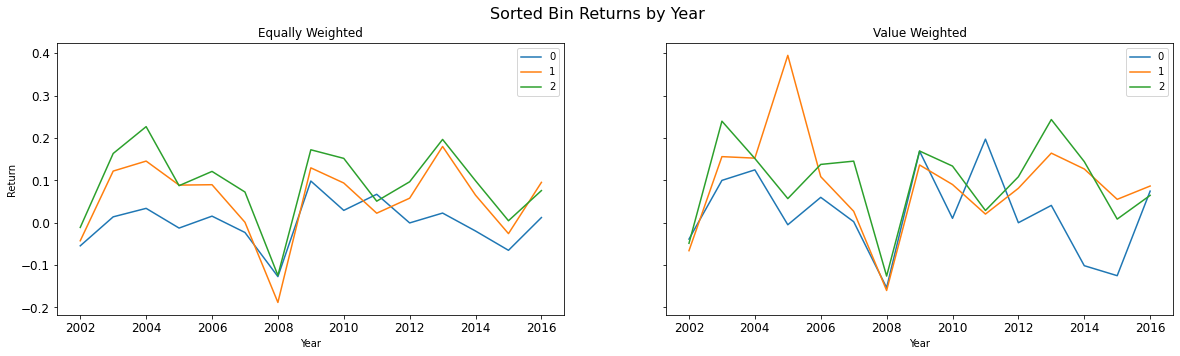

In [41]:
fig, ax = plt.subplots(1,2,figsize=(20,5), sharey=True)
eq_returns_df[:-1].plot(ax=ax[0], title='Equally Weighted', fontsize=12, xlabel='Year', ylabel='Return')
weighted_returns_df[:-1].plot(ax=ax[1], title='Value Weighted', fontsize=12, xlabel='Year', ylabel='Return')
plt.suptitle('Sorted Bin Returns by Year', fontsize=16)

## Building Long-short Portfolio

In [42]:
fama_french_annual['equal'] = eq_returns_df[long_bin] - eq_returns_df[short_bin] # Long the high bin, short the low bin
fama_french_annual['weighted'] = weighted_returns_df[long_bin] - eq_returns_df[short_bin] # Long the high bin, short the low bin
fama_french_annual.dropna(inplace=True)
fama_french_annual

,mkt_rf,smb,hml,rf,equal,weighted
year,,,,,,
2002,-0.2276,0.0445,0.0809,0.0165,0.043423,0.005937
2003,0.3075,0.2651,0.0511,0.0102,0.149676,0.225974
2004,0.1072,0.0443,0.0767,0.0120,0.192994,0.117731
2005,0.0309,-0.0236,0.0943,0.0298,0.100159,0.069612
2006,0.1060,0.0008,0.1175,0.0480,0.105643,0.122166
2007,0.0104,-0.0740,-0.1728,0.0466,0.095563,0.168474
2008,-0.3834,0.0245,0.0083,0.0160,0.002796,0.001203
2009,0.2826,0.0935,-0.0942,0.0010,0.073816,0.070892
2010,0.1737,0.1429,-0.0510,0.0012,0.122840,0.104642


# CAPM

In [43]:
from patsy import dmatrices
import statsmodels.api as sm

def regress(df, weight = 'equal', verbose=False):
    results = pd.DataFrame(columns=['weight','alpha', 'beta', 'shapre','t-stat', 'p-value'])
    if weight == 'equal':
        yvars = 'equal'
    elif weight == 'weighted':
        yvars = 'weighted'

    for mode in ['capm', 'fama-french']:
        if mode == 'capm':
            xvars = 'mkt_rf'
        elif mode == 'fama-french':
            xvars = 'mkt_rf + smb + hml'
        
        y, x = dmatrices(yvars+'~'+xvars, data=df)
        model = sm.OLS(y, x).fit()
        results.loc[mode] = [weight, model.params[0], model.params[1], np.round(y.mean()/y.std(), 2),model.tvalues[1], model.pvalues[1]]
        

        if mode == 'capm' and verbose:
            plt.figure(figsize=(10,5))
            plt.title('CAPM ('+weight.upper()+f'): α: {np.round(model.params[0], 2)}; ß: {np.round(model.params[1], 2)}', fontsize=12)
            plt.xlabel('Market Return')
            plt.ylabel('Return')
            plt.plot(df[xvars], df[yvars], 'o', label='Returns')
            plt.plot(df[xvars], model.fittedvalues, 'r--.', label='OLS', alpha=0.5, linewidth=2)
            plt.axvline(0, color='black', linewidth=1, linestyle='--', alpha=0.5)
            plt.axhline(0, color='black', linewidth=1, linestyle='--', alpha=0.5)
            plt.legend(loc='best')
            plt.show()
    return results

# Results

In [44]:
pd.concat([regress(fama_french_annual, 'equal'), regress(fama_french_annual, 'weighted')])

,weight,alpha,beta,shapre,t-stat,p-value
capm,equal,0.070908,0.163264,1.38,2.075227,0.056877
fama-french,equal,0.067966,0.143026,1.38,1.707338,0.113477
capm,weighted,0.069394,0.234060,1.14,2.433579,0.028943
fama-french,weighted,0.067005,0.205689,1.14,1.883282,0.084120


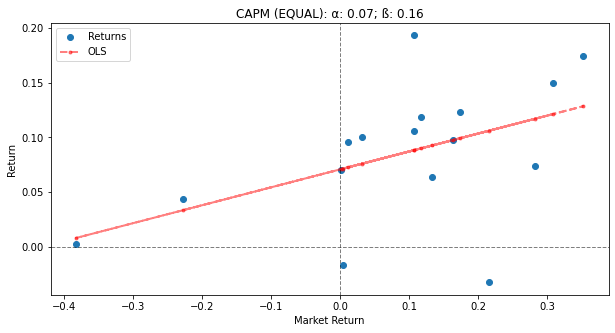

,weight,alpha,beta,shapre,t-stat,p-value
capm,equal,0.070908,0.163264,1.38,2.075227,0.056877
fama-french,equal,0.067966,0.143026,1.38,1.707338,0.113477


In [45]:
regress(fama_french_annual, 'equal', verbose=True)

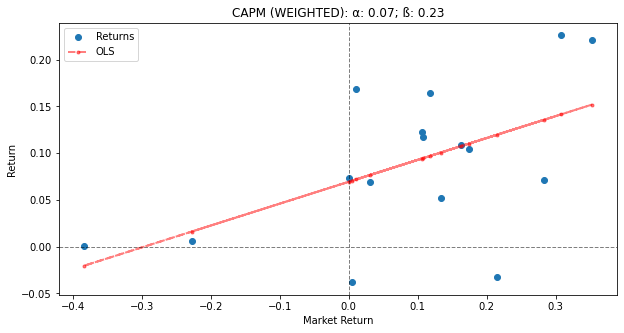

,weight,alpha,beta,shapre,t-stat,p-value
capm,weighted,0.069394,0.234060,1.14,2.433579,0.028943
fama-french,weighted,0.067005,0.205689,1.14,1.883282,0.084120


In [46]:
regress(fama_french_annual, 'weighted', verbose=True)